In [1]:
import glob
import pickle
import seaborn as sns
import pandas as pd

In [2]:
d2go = glob.glob("/home/khlee/work/desmond/output/d2go/bro/d2go_bro*/output/gpcr_interface.p")
d2go.sort()
d2gi = glob.glob("/home/khlee/work/desmond/output/d2gi/bro/d2gi_bro*/output/gpcr_interface.p")
d2gi.sort()

In [3]:
data = {"Value":[], "System":[], "Simulation":[]}
for i in range(len(d2go)):
    i_d2go = pickle.load(open(d2go[i],"rb"))
    cat_d2go = ["d2go" for a in range(len(i_d2go))]
    i_d2gi = pickle.load(open(d2gi[i],"rb"))
    cat_d2gi = ["d2gi" for a in range(len(i_d2gi))]
    sim = [i+1 for a in range(len(i_d2go+i_d2gi))]
    
    data["Value"]+=(i_d2go+i_d2gi)
    data["System"]+=(cat_d2go+cat_d2gi)
    data["Simulation"]+=(sim)

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Value,System,Simulation
0,1639.0,d2go,1
1,1579.0,d2go,1
2,1567.0,d2go,1
3,1539.0,d2go,1
4,1579.0,d2go,1
...,...,...,...
13995,1564.0,d2gi,6
13996,1586.0,d2gi,6
13997,1619.0,d2gi,6
13998,1629.0,d2gi,6


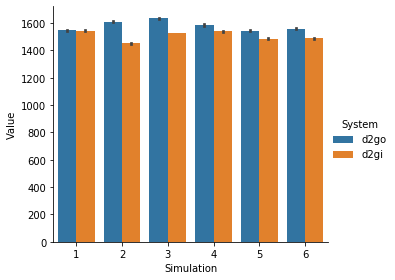

In [6]:
g = sns.catplot(x="Simulation", y="Value",
                hue="System",
                data=df, kind="bar",
                height=4, aspect=1.2);